## An analysis of the Gradient Descent Algorithms - Final Project
Assiya Karatay, Ayomide Awojobi, Ruiqi Chang

Graduate Students

BU MET College, Computer Science Department 

Spring, 2022

CS566 - Professor Alexander Belyaev

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## Problem 
Building a simple neural network using only Numpy and Pandas.

Note: A single Perceptron neural network is basically a simple linear regression model.

Using single layer Perceptron neural network to classify “Iris” data set and use 
(i)batch and minibatch gradient descent  
(ii) Stochastic gradient descent to adjust the weights and classify “Iris Setosa”.

### (i)	Input: data is “Iris” data which is part of Scikit Learn. This is a famous dataset that includes the sepal and petal length and width of 150 Iris flowers of three species: “Iris setosa”, “iris versicolor”, and “iris virginica”.

In [2]:
# load the data
iris = load_iris() 
X = pd.DataFrame(iris.data, columns=iris.feature_names).values #numpy array
y_all = pd.DataFrame(iris.target, columns=['target'])
print(X.shape)

(150, 4)


### (ii)	Data consists of three type of Iris flowers and four set of features.

In [3]:
# print(iris.DESCR)

### (iv)	Use four set of features to classify “Iris Setosa” flowers from the other two.

In [4]:
# y is a new dataframe where 0 means iris setosa, 1 means other two categories
y = y_all.where(y_all.target<=0,1).values.flatten()
y.shape

(150,)

### (v)	Divide data to 80% training, and 20% test set.

In [5]:
X = np.insert(X, 0, 1,axis=1) # add a column of ones for bias
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [6]:
x_train.shape, y_train.shape

((120, 5), (120,))

### (iii)	Write a code and build a single layer Perceptron as follows.
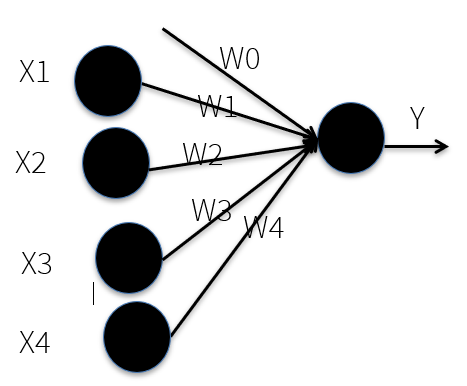

In [7]:
# a single layer perceptron neural network 
class p(object):
    
       
    def __init__(self, learning_rate=1, epochs=100):
#         self.w1 = np.random.randn((n_x,))*.01
#         self.w2 = np.random.randn(())*.01
          
        self.epochs = epochs
        self.learning_rate = learning_rate
    def sizes(x,y):
        n_x = X.shape[0] # size of input layer
        n_h = 3
        n_y = Y.shape[1] # size of output layer
        return n_x, n_h, n_y
        
#     our problem is for classification to two categories 0 and 1
#     we use sigmoid function because it is smooth and we can find the derivative of it
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

#   feedforward step of predicting the output y
    def predict(self, x,w):
        z = np.dot(x, w)
        a = self.sigmoid(z)
        return a

#   this function calculates the partial derivatives of cost function to each of weights
    def calculate_gradient(self, x, i, y, a):
        return 1/float(len(y)) * np.sum(a*x[:,i])

#   Mean Squared Error 
    def mse(self, actual, pred):
        return np.square(np.subtract(actual, pred)).mean()
    
#   GD to update weights taking into account the learning rate
    def gradient_descent(self ,X, y_train):
        mse_history = []
        w = np.random.randn(5)*.1
        
        for epoch in range(self.epochs):
            y_pred = self.predict(X,w) 
            a = (y_pred - y_train) * y_pred * (1- y_pred) #activator
            for i in range(5):
                w[i] -= self.learning_rate * self.calculate_gradient(X,i,y_train,a)
            mse_history.append(self.mse(y_train, y_pred)) # Mean Squared Error
        return w,mse_history
    
    
#     SGD randomly picks one data point from the whole data set at each iteration to update weights
    def stochastic_gradient_descent(self ,X, y):
        n = len(y)
        mse_history = []
        w = np.random.randn(5)*.1

        for epoch in range(self.epochs):
            error = 0.0
            for idx in range(n):
                rand_ind = np.random.randint(0,n) #random index
                X_idx = X[rand_ind,:].reshape(1,X.shape[1])
                y_idx = y[rand_ind].reshape(1,1)
            
                y_pred = self.predict(X_idx,w) 
                a = (y_pred - y_idx) * y_pred * (1- y_pred) #activator
                for i in range(5):
                    w[i] -= self.learning_rate * self.calculate_gradient(X_idx,i,y_idx,a)
                error += self.mse(y_idx, y_pred)
            mse_history.append(error) # Mean Squared Error
        return w, mse_history
    
    
#     MBGD takes a small number of data points instead of just one point at each step
    def minibatch_gradient_descent(self ,X, y, batch_size = 12):
        n = len(y)
        mse_history = []
        n_batches = int(n/batch_size)
        w = np.random.randn(5)*.1

        for epoch in range(self.epochs):
            error = 0.0
            indices = np.random.permutation(n)
            X = X[indices]
            y = y[indices]
            for idx in range(0,n,batch_size):
                X_idx = X[idx:idx+batch_size]
                y_idx = y[idx:idx+batch_size]

            
                y_pred = self.predict(X_idx,w) 
                a = (y_pred - y_idx) * y_pred * (1- y_pred) #activator
                for i in range(5):
                    w[i] -= self.learning_rate * self.calculate_gradient(X_idx,i,y_idx,a)
                error += self.mse(y_idx, y_pred)
            mse_history.append(error) # Mean Squared Error
        return w, mse_history
    
    
#   BGD takes all data points at each step
    def batch_gradient_descent(self ,X, y):
        return self.minibatch_gradient_descent(X, y, batch_size = len(y))
        
#   this function calculates         
    def accuracy(self,actual, pred):
        correct = 0
        predicted = np.array(1 * (pred > 0.5))
        for i in range(len(actual)):
            if actual[i] == predicted[i]:
                correct += 1
        print('The y_test is ', actual)
        print('The predicted y is ', predicted)
        return correct / float(len(actual)) * 100.0
            

(vi)	Assume anything that is needed to solve the problem. Make sure to state your assumptions.

1.	Use Batch Gradient Descent to adjust the weights. (Write batch gradient descent code.)
a.	Plot the MSE (Mean Square Error) of training set as a function of iteration
b.	Plot the MSE (Mean Square Error) of testing set as a function of iteration

2.	Use Stochastic Gradient Descent to adjust the weights (Write stochastic gradient descent code.)
a.	Plot the MSE (Mean Square Error) of training set as a function of iteration per epoch
b.	Plot the MSE (Mean Square Error) of testing set as a function of iteration per epoch

3.	Use minibatch with size 12 to adjust the weights.
a.	Plot the MSE (Mean Square Error) of training set as a function of iteration per epoch
b.	Plot the MSE (Mean Square Error) of testing set as a function of iteration per epoch


In [8]:
def plot_mse(epochs, y, z, title):
    # X-axis represents epochs 
    X = np.arange(0, epochs)
    # Y-axis represents the MSE
    plt.plot(X, y, color='r', label='train set')
    plt.plot(X, z, color='b', label='test set')

    plt.xlabel("epochs")
    plt.ylabel("Mean Squared Error")
    plt.title(title)

    plt.legend()
    plt.show()

In [9]:
# hyperparameters can be changed there
epochs=20
learning_rate=0.1

The y_test is  [1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1]
The predicted y is  [1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1]
The accuracy is  100.0


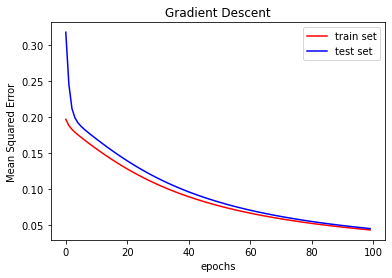

In [10]:
# GD
# hyperparameters can be changed there
epochs=100
learning_rate=0.1
perceptron = p(epochs = epochs, learning_rate = learning_rate)
weights_train,mse_gd_train = perceptron.gradient_descent(x_train, y_train)
weights_test,mse_gd_test = perceptron.gradient_descent(x_train, y_train)

pred = perceptron.predict(x_test,weights_train)
acc = perceptron.accuracy(y_test,pred)

print('The accuracy is ', acc)
plot_mse(epochs, mse_gd_train, mse_gd_test,'Gradient Descent')

## Stochastic Gradient Descent

weights =  [-0.0804499  -0.32892341 -1.00731607  1.56923119  0.72718715]
The y_test is  [1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1]
The predicted y is  [1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1]
The accuracy is  100.0


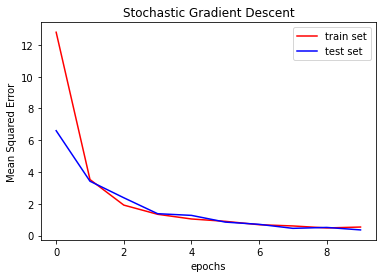

In [11]:
#SGD
# hyperparameters can be changed there
epochs=10
learning_rate=0.1
perceptron = p(epochs = epochs, learning_rate = learning_rate)
w_sgd_train, mse_sgd_train = perceptron.stochastic_gradient_descent(x_train, y_train)
w_sgd_test, mse_sgd_test = perceptron.stochastic_gradient_descent(x_test, y_test)

print('weights = ', w_sgd_train)
pred = perceptron.predict(x_test,w_sgd_train)
acc = perceptron.accuracy(y_test,pred)
print('The accuracy is ', acc)
plot_mse(epochs, mse_sgd_train, mse_sgd_test, 'Stochastic Gradient Descent')

## MiniBatch Gradient Descent

weights =  [ 0.03701027 -0.08988391 -0.43830497  0.63282417  0.29779742]
The y_test is  [1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1]
The predicted y is  [1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1]
The accuracy is  100.0


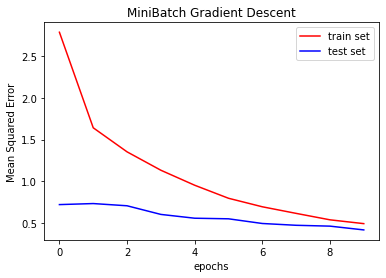

In [12]:
perceptron = p(epochs = epochs, learning_rate = learning_rate)
w_mbgd_train, mse_mbgd_train = perceptron.minibatch_gradient_descent(x_train, y_train)
w_mbgd_test, mse_mbgd_test = perceptron.minibatch_gradient_descent(x_test, y_test)

print('weights = ', w_mbgd_train)
pred = perceptron.predict(x_test,w_mbgd_train)
acc = perceptron.accuracy(y_test,pred)
print('The accuracy is ', acc)
plot_mse(epochs, mse_mbgd_train, mse_mbgd_test, 'MiniBatch Gradient Descent')

## Batch Gradient Descent

weights =  [ 0.05616489 -0.0319045   0.10393388  0.1185217   0.17934723]
The y_test is  [1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1]
The predicted y is  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
The accuracy is  66.66666666666666


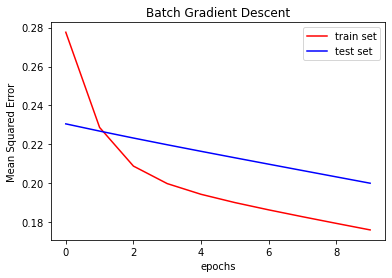

In [13]:
perceptron = p(epochs = epochs, learning_rate = learning_rate)
w_bgd_train, mse_bgd_train = perceptron.batch_gradient_descent(x_train, y_train)
w_bgd_test, mse_bgd_test = perceptron.batch_gradient_descent(x_test, y_test)

print('weights = ', w_bgd_train)
pred = perceptron.predict(x_test,w_bgd_train)
acc = perceptron.accuracy(y_test,pred)
print('The accuracy is ', acc)
plot_mse(epochs, mse_bgd_train, mse_bgd_test, 'Batch Gradient Descent')

## Pros & Cons
### Mini-Batch Gradient Descent pros:
Convergence is more stable than stochastic gradient descent 
It is computationally efficient 
Fast learning since we perform more updates
### Mini-Batch Gradient Descent cons:
We have to configure the mini-batch size hyperparameter
 
### Stochastic Gradient Descent pros:
It is easier to fit into memory due to a single training sample being processed by the network.
It is computationally fast as only one sample is processed at a time 
For larger datasets, it can converge faster as it causes updates to the parameters more frequently
### Stochastic Gradient Descent cons:
Can veer off in the wrong direction due to frequent updates
Due to noisy steps, it will take longer to achieve convergence to the minima of the loss function
Frequent updates are computationally expensive due to using all resources for processing one training sample at a time 
### Batch Gradient Descent pros:
More stable convergence and error gradient than stochastic gradient descent 
Embraces the benefits of vectorization
A more direct path is taken to the minimum 
### Batch Gradient Descent cons:
Can converge at local minima and saddle points
Slower learning since an update is performed only after we go through all observations

#### We observe the tendency that all MSE values decreases as the number of iterations increases. 
#### We successfully build a perceptron with 3 training methods: SGD, minibatch and batch GD. GD was built initially to start with the base

The end.